# EXPLORATORY DATA ANALYSIS : PAKISTAN'S LARGEST E-COMMERCE DATASET

##### by : Muhammad Al-farisy

### BACKGROUND
Dataset ini merupakan kumpulan data pesanan perusahaan e-commers terbesar dari negara Pakistan tahun 2016-2018. Sektor ekonomi perusahaan berada di sektor niaga digital dan termasuk dalam perusahaan dagang. Data dikumpulkan dari berbagai pedagang e-commerce sebagai bagian dari studi penelitian yang dilakukan oleh **ZEESHAN-UL-HASSAN USMANI**. Masalah yang harus di selesaikan dalam dataset ini adalah perusahaan sedang membutuhkan rekomendasi strategi untuk mengurangi tingkat pembatalan,refund dan pending transaksi pesanan. Hasil yang di harapkan pada analisa ini menemukan rekomendasi yang memiliki potensi meningkatkan penjualan.

### DATA UNDERSTANDING
- Dataset yang akan diterima berupa dataset dengan format csv, berisikan 1.048.575 baris dan 26 kolom. Berikut isi dari kolom tabel :

    1. Item_id : Nomor urut product dalam database di website saat barang masuk troli
    2. Status : Informasi terkait proses pesanan barang
    3. Created_at : Informasi terkait tanggal dibuat pesanan
    4. Sku : Kode unik dari toko (barcode) yang bertujuan untuk pengecekan barang
    5. Price : Harga per unit produk yang dijual (tipe data float)
    6. Qty_ordered : Total quantity barang yang dipesan
    7. Grand_total : Total bersih yang harus di bayar customer (telah di potong diskon)
    8. Increment_id : Kode electronic struck pembelian
    9.  Category_name_1 : Katalog barang yang dijual
    10. Sales_commision_code : Kode komisi / fee penjualan
    11. Discount_amount : Nominal diskon yang diberikan
    12. Payment_method : Metode pembayaran yang disediakan perusahaan/ e-commers
    13. Working_date : Tanggal pengerjaan pesanan 
    14. BI_Status : Kesimpulan dari status proses pesanan yang membuat perusahaan menerima uang, mengembalikan uang, atau batal mendapatkan uang.
    15. MV : Harga satuan produk (tipe data string)
    16. Year : Tahun customer membeli produk
    17. Month : Bulan customer membeli produk
    18. Customer_since : Tanggal customer bergabung ke aplikasi e-commers
    19. M-Y : Menyimpan informasi tentang bulan dan tahun customer membeli produck
    20. FY : Tahun fiskal untuk perusahaan swasta di negara pakistan
    21. Customer_ID : Nomor unik customer
    22. Unnamed : 21 : Kosong kosong
    23. Unnamed : 22 : Kosong kosong
    24. Unnamed : 23 : Kosong kosong
    25. Unnamed : 24 : Kosong kosong
    26. Unnamed : 25 : Kosong kosong

# Bussines Question
1. Bagaimana hasil dari status pesanan barang ?
2. Apa kategori barang yang memiliki status pemesanan completed dan cancelled tertinggi ?
3. Bagaimana hasil dari metode pembayaran ?
4. Berapa banyak transaksi pada metode pembayaran yang mendapatkan diskon ?
5. Berapa banyak total transaksi metode pembayaran dengan status completed ?
6. Kapan transaksi dengan status completed paling banyak terjadi (berdasarkan bulan pemesanan) ?

# CONNECTION DATABASE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# from dython.nominal import associations
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

# DATA PREPARATION

- Mengecek total baris dan total kolom :

In [4]:
df.shape

(1048575, 26)

- Mengecek informasi nama kolom, kolom yang tidak ada nilai dan tipe data kolom :

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

Dari hasil analisa informasi data di atas terdapat 3 hal yang harus di tindak lanjuti :
- Perbaikan nama kolom yang sesuai (Menghapus spasi yang lebih, menggunakan huruf kapital, menggunakan tanda "_" untuk kolom yang memiliki 2 kata)
- Menghitung total Missing Values 
- Perbaikan tipe data

In [6]:
# Mengecek jumlah missing value
df.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

## HANDLING DATA KATEGORIKAL

In [7]:
### Perbaikan nama kolom
df.rename(columns={'Customer ID':'Customer_Id','item_id':'Item_Id','status':'Status','created_at':'Created_at','sku':'Stock_Keeping_Unit','price':'Price','qty_ordered':'Ordered_Quantity','grand_total':'Grand_Total','increment_id':'Increment_Id','category_name_1':'Category','sales_commission_code':'Sales_Commission_Code','discount_amount':'Discount_Amount','payment_method':'Payment_Method','Working Date':'Working_Date','BI Status':'Business_Insight_Status',' MV ': 'MV','Customer Since':'Customer_Since','M-Y':'Month-Year'},inplace=True)

In [8]:
# Menghapus Missing Values (Kolom yang memiliki missing values 100%)
df.drop(columns=(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25']),axis=1, inplace=True)

In [9]:
# Menghapus Missing Values (Yang 1 baris nya full mising values)
df.drop(df.index[584524:1048575],inplace=True)

In [10]:
df.isnull().sum()

Item_Id                         0
Status                         15
Created_at                      0
Stock_Keeping_Unit             20
Price                           0
Ordered_Quantity                0
Grand_Total                     0
Increment_Id                    0
Category                      164
Sales_Commission_Code      137175
Discount_Amount                 0
Payment_Method                  0
Working_Date                    0
Business_Insight_Status         0
MV                              0
Year                            0
Month                           0
Customer_Since                 11
Month-Year                      0
FY                              0
Customer_Id                    11
dtype: int64

##### Handling Kolom status

In [11]:
# Pengecekan nama nama nilai yang berbeda dalam kolom status
df['Status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [12]:
# Sebelum menghapus Missing Values
# Nilai dari kolom Status baris yang berisikan \N atau NaN
status_Old = df[(df['Status']!='complete')&(df['Status']!='canceled')&(df['Status']!='received')&(df['Status']!='order_refunded')&(df['Status']!='refund')&(df['Status']!='cod')&(df['Status']!='paid')&(df['Status']!='closed')&(df['Status']!='payment_review')&(df['Status']!='pending')&(df['Status']!='processing')&(df['Status']!='holded')&(df['Status']!='fraud')&(df['Status']!='pending_paypal')&(df['Status']!='exchange')]
status_Old

,Item_Id,Status,Created_at,Stock_Keeping_Unit,Price,Ordered_Quantity,Grand_Total,Increment_Id,Category,Sales_Commission_Code,...,Payment_Method,Working_Date,Business_Insight_Status,MV,Year,Month,Customer_Since,Month-Year,FY,Customer_Id
255520,526623.0,\N,7/3/2017,test-product-3,3.0,2.0,231.0,100332005,\N,\N,...,cod,7/3/2017,Gross,6,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255521,526624.0,\N,7/3/2017,test-product,75.0,1.0,231.0,100332005,\N,\N,...,cod,7/3/2017,Gross,75,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255624,526754.0,\N,7/3/2017,test-product-3,3.0,2.0,231.0,100332075,\N,\N,...,cod,7/3/2017,Gross,6,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255625,526755.0,\N,7/3/2017,test-product,75.0,1.0,231.0,100332075,\N,\N,...,cod,7/3/2017,Gross,75,2017.0,7.0,2016-7,7-2017,FY18,1423.0
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,NaN,...,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513740,827195.0,NaN,4/16/2018,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,423,2018.0,4.0,2018-4,4-2018,FY18,105059.0


- Berdasarkan pengecekan missing values dari kolom status, terdapat 19 baris missing values dan ini akan di hapus.

In [13]:
# Menghapus nilai missing value di kolom status
df.dropna(subset=['Status'],inplace=True)

In [14]:
## Penghapusan Data Anomali Values
# df.drop(df[(df['Status']=='\\N')].index,inplace=True)
df.drop(df[(df['Status']=='\\N')].index,inplace=True)

In [15]:
# Pengecekan jumlah missing values setelah di hapus
df['Status'].isna().sum()

0

In [16]:
# Sesudah menghapus Missing Values
# Nilai dari kolom Status baris yang berisikan \N atau NaN
status_New = df[(df['Status']!='complete')&(df['Status']!='canceled')&(df['Status']!='received')&(df['Status']!='order_refunded')&(df['Status']!='refund')&(df['Status']!='cod')&(df['Status']!='paid')&(df['Status']!='closed')&(df['Status']!='payment_review')&(df['Status']!='pending')&(df['Status']!='processing')&(df['Status']!='holded')&(df['Status']!='fraud')&(df['Status']!='pending_paypal')&(df['Status']!='exchange')]
status_New

,Item_Id,Status,Created_at,Stock_Keeping_Unit,Price,Ordered_Quantity,Grand_Total,Increment_Id,Category,Sales_Commission_Code,...,Payment_Method,Working_Date,Business_Insight_Status,MV,Year,Month,Customer_Since,Month-Year,FY,Customer_Id


In [17]:
# Perbaikan nama nilai kolom status 
def kolom_status (x) :
    if x == 'complete':
        return 'Completed'
    elif x == 'closed':
        return 'Completed'
    elif x == 'received':
        return 'Completed'
    elif x == 'paid':
        return 'Completed'
    elif x == 'cod':
        return 'Completed'
    elif x == 'order_refunded':
        return 'Refund'
    elif x == 'refund':
        return 'Refund'
    elif x == 'exchange':
        return 'Refund'
    elif x == 'pending':
        return 'Pending'
    elif x == 'payment_review':
        return 'Pending'
    elif x == 'processing':
        return 'Pending'
    elif x == 'holded':
        return 'Pending'
    elif x == 'pending_paypal':
        return 'Pending'
    elif x == 'fraud':
        return 'Fraud'
    elif x == 'canceled':
        return 'Cancelled'

In [18]:
# # Menjalankan perintah update nama nilai kolom status
df['Status'] = df['Status'].apply(kolom_status)

In [19]:
df['Status'].value_counts()

Completed    315487
Cancelled    201249
Refund        67583
Pending         176
Fraud            10
Name: Status, dtype: int64

In [20]:
pd.crosstab(df['Status'],columns='count').reset_index()

col_0,Status,count
0,Cancelled,201249
1,Completed,315487
2,Fraud,10
3,Pending,176
4,Refund,67583


In [21]:
df.drop(columns='Business_Insight_Status',axis=1,inplace=True)

In [22]:
# Perbaikan nama nilai kolom status 
def kolom_bi (x) :
    if x == 'Completed':
        return 'Net'
    elif x == 'Completed':
        return 'Net'
    elif x == 'Completed':
        return 'Net'
    elif x == 'Completed':
        return 'Net'
    elif x == 'Completed':
        return 'Net'
    elif x == 'Refund':
        return 'Valid'
    elif x == 'Refund':
        return 'Valid'
    elif x == 'Refund':
        return 'Valid'
    elif x == 'Pending':
        return 'Gross'
    elif x == 'Pending':
        return 'Gross'
    elif x == 'Pending':
        return 'Gross'
    elif x == 'Pending':
        return 'Gross'
    elif x == 'Pending':
        return 'Gross'
    elif x == 'Fraud':
        return 'Gross'
    elif x == 'Cancelled':
        return 'Gross'

In [23]:
# # Menjalankan perintah update nama nilai kolom status
df.insert(14, column='Business_Insight_Status',value=df['Status'].apply(kolom_bi))

##### Handling Kolom Stock Keeping Unit

In [24]:
df['Stock_Keeping_Unit'].unique()

array(['kreations_YI 06-L',
       'kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free',
       'Ego_UP0017-999-MR0', ..., 'WOFVAL59D5EA84167F9-M',
       'WOFNIG5B4D7EB0E9FDD-L', 'WOFSCE5AE00357AECDE'], dtype=object)

In [25]:
df[['Stock_Keeping_Unit']].isnull().sum()

Stock_Keeping_Unit    20
dtype: int64

In [26]:
# Menghapus nilai missing value di kolom status
df.dropna(subset=['Stock_Keeping_Unit'],inplace=True)

Handling category product

In [27]:
df['Category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education', nan], dtype=object)

In [28]:
# Mengecek persentase misisng values kategori
round((((df['Category'].isna().sum())/len(df)) * 100),7)

0.0280589

In [29]:
# df[(df['Category']=='\\N')& (df['Status'].notnull())][['Status','Category']].head(20)
df[(df['Category']!='\\N')]

,Item_Id,Status,Created_at,Stock_Keeping_Unit,Price,Ordered_Quantity,Grand_Total,Increment_Id,Category,Sales_Commission_Code,...,Payment_Method,Working_Date,MV,Business_Insight_Status,Year,Month,Customer_Since,Month-Year,FY,Customer_Id
0,211131.0,Completed,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,"1,950",Net,2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,Cancelled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,240,Gross,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,Cancelled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,"2,450",Gross,2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,Completed,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,360,Net,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,Refund,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,"1,110",Valid,2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,Completed,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,699,Net,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,Pending,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,"35,599",Gross,2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,Pending,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,"259,998",Gross,2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,Pending,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,"174,600",Gross,2018.0,8.0,2018-7,8-2018,FY19,113474.0


Dari hasil pengecekan mising values kolom category terdapat 7829 baris yang memiliki missing values dari total keseluruhan baris category 584485 atau sekitar 0,02% sehingga kolom missing values ini akan di hapus.

In [30]:
# menghapus missing values
df.dropna(subset=['Category'],inplace=True)

In [31]:
# Menghapus category \N
df.drop(df[(df['Category']=='\\N')].index,inplace=True)


In [32]:
# Mengcek total missing values
df[['Category']].isnull().sum()

Category    0
dtype: int64

Handling Column Sales Commission Code

In [33]:
df['Sales_Commission_Code'].unique()

array(['\\N', 'R-FSD-52352', '105259', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

In [34]:
# Menghitung total missing values
df['Sales_Commission_Code'].isnull().sum()

136988

In [35]:
# Menghitung baris anomali
df[df['Sales_Commission_Code']=='\\N']

,Item_Id,Status,Created_at,Stock_Keeping_Unit,Price,Ordered_Quantity,Grand_Total,Increment_Id,Category,Sales_Commission_Code,...,Payment_Method,Working_Date,MV,Business_Insight_Status,Year,Month,Customer_Since,Month-Year,FY,Customer_Id
0,211131.0,Completed,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,"1,950",Net,2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,Cancelled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,240,Gross,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,Cancelled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,"2,450",Gross,2016.0,7.0,2016-7,7-2016,FY17,3.0
4,211136.0,Refund,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,"1,110",Valid,2016.0,7.0,2016-7,7-2016,FY17,5.0
5,211137.0,Cancelled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,\N,...,cod,7/1/2016,80,Gross,2016.0,7.0,2016-7,7-2016,FY17,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424824,724038.0,Cancelled,12/31/2017,ENTPAN5A0CACC6C5FEC,8426.0,1.0,8426.0,100441594,Entertainment,\N,...,cod,12/31/2017,"8,426",Gross,2017.0,12.0,2017-12,12-2017,FY18,84402.0
424825,724053.0,Cancelled,12/31/2017,MATHUA5A0C4EF0631F0,12551.0,1.0,12551.0,100441605,Mobiles & Tablets,\N,...,cod,12/31/2017,"12,551",Gross,2017.0,12.0,2017-10,12-2017,FY18,62383.0
424826,724056.0,Cancelled,12/31/2017,MOR59F333319808D,499.0,2.0,725.0,100441604,Superstore,\N,...,Easypay_MA,12/31/2017,998,Gross,2017.0,12.0,2016-11,12-2017,FY18,14025.0
424827,724057.0,Cancelled,12/31/2017,KNO59D64DAC18B6C,27.0,1.0,725.0,100441604,Superstore,\N,...,Easypay_MA,12/31/2017,27,Gross,2017.0,12.0,2016-11,12-2017,FY18,14025.0


In [36]:
# Menghitung persentase missing values
round((((df['Sales_Commission_Code'].isna().sum())/len(df)) * 100),2)

23.76

In [37]:
# Menghapus missing values sales commision code
df.dropna(subset=['Sales_Commission_Code'],inplace=True)

In [38]:
# Menghapus nilai anomalies
df.drop(df[(df['Sales_Commission_Code']=='\\N')].index,inplace=True)

In [39]:
df['Sales_Commission_Code'].head()

3      R-FSD-52352
13          105259
15          105259
16    R-KHW-104406
17    R-KHW-104406
Name: Sales_Commission_Code, dtype: object

Handling Payment_Method

In [40]:
# Mengecek Missing Values
df['Customer_Since'].isnull().sum()

0

Missing value pada customer since sudah hilang saat saat

Handling Business Insight Status 

In [41]:
df['Business_Insight_Status'].value_counts()

Net      69353
Gross    21640
Valid    15744
Name: Business_Insight_Status, dtype: int64

Handling Customer ID

In [42]:
# Mengecek Total Missing Values Customer ID
df[df['Customer_Id'].isnull()]

,Item_Id,Status,Created_at,Stock_Keeping_Unit,Price,Ordered_Quantity,Grand_Total,Increment_Id,Category,Sales_Commission_Code,...,Payment_Method,Working_Date,MV,Business_Insight_Status,Year,Month,Customer_Since,Month-Year,FY,Customer_Id


Handling Payment Method

- Memperbaiki spasi nilai dari payment method

In [43]:
# Perbaikan nama nilai kolom status 
def kolom_payment (x) :
    if x == 'cod':
        return 'Cash On Delivery'
    elif x == 'easypay_voucher':
        return 'Easy Payment Voucher'
    elif x == 'Payaxis':
        return 'Payment Axis'
    elif x == 'Easypay':
        return 'Easy Payment Voucher'
    elif x == 'jazzvoucher':
        return 'Jazz Voucher'
    elif x == 'jazzwallet':
        return 'Jazz Wallet'
    elif x == 'bankalfalah':
        return 'Bank Alfalah'
    elif x == 'Easypay_MA':
        return 'Easy Payment Massachusetts'
    elif x == 'customercredit':
        return 'Customer Credit'
    elif x == 'cashatdoorstep':
        return 'Cash at Door Step'
    elif x == 'mcblite':
        return 'MCB Lite'
    elif x == 'apg':
        return 'Ambulatory Patient Groups'
    elif x == 'internetbanking':
        return 'Internet Banking'
    elif x == 'ublcreditcard':
        return 'UBL Credit Card'
    elif x == 'mygateway':
        return 'My Gateway Payment'
    elif x == 'financesettlement':
        return 'Finance Settlement Payment'
    elif x == 'productcredit':
        return 'Product Credit'


In [44]:
# # Menjalankan perintah update nama nilai kolom status
df['Payment_Method'] = df['Payment_Method'].apply(kolom_payment)

In [45]:
# Perbaikan nama nilai kolom status 
def kolom_payment_categori (x) :
    if x == 'Cash On Delivery':
        return 'COD'
    elif x == 'Easy Payment Voucher':
        return 'Debit Card'
    elif x == 'Payment Axis':
        return 'Credit Card'
    elif x == 'Jazz Voucher':
        return 'Debit Card'
    elif x == 'Jazz Wallet':
        return 'Electronic Wallet'
    elif x == 'Bank Alfalah':
        return 'Tranfer Bank'
    elif x == 'Easy Payment Massachusetts':
        return 'Electronic Wallet'
    elif x == 'Customer Credit':
        return 'Credit Card'
    elif x == 'Cash at Door Step':
        return 'Electronic Wallet'
    elif x == 'MCB Lite':
        return 'Internet Banking'
    elif x == 'Ambulatory Patient Groups':
        return 'Reimburse'
    elif x == 'Internet Banking':
        return 'Internet Banking'
    elif x == 'UBL Credit Card':
        return 'Credit Card'
    elif x == 'My Gateway Payment':
        return 'Credit Card'
    elif x == 'Finance Settlement Payment':
        return 'Credit Card'
    elif x == 'Product Credit':
        return 'Credit Card'


In [46]:
# # Menjalankan perintah update nama nilai kolom status
df.insert(12, column='Payment_Method_Category',value=df['Payment_Method'].apply(kolom_payment_categori))

In [47]:
df.isna().sum()

Item_Id                    0
Status                     0
Created_at                 0
Stock_Keeping_Unit         0
Price                      0
Ordered_Quantity           0
Grand_Total                0
Increment_Id               0
Category                   0
Sales_Commission_Code      0
Discount_Amount            0
Payment_Method             0
Payment_Method_Category    0
Working_Date               0
MV                         0
Business_Insight_Status    0
Year                       0
Month                      0
Customer_Since             0
Month-Year                 0
FY                         0
Customer_Id                0
dtype: int64

Handling Kolom MV

- Menghapus kolom MV karena kolom MV berisikan data dari kolom price, hanya saja di buat string dan di tambahkan tanda (,). Sehingga kolom MV tidak digunakan informasi nya sudah ada di kolom price.

In [48]:
df.drop(columns='MV',inplace=True)

### Handling Values Numerical
- Harga Diskon

In [49]:
# Perbaikan nama nilai kolom status 
def kolom_diskon (x) :
    if x != 0:
        return 'Dapat Diskon'
    elif x == 0:
        return 'Tidak Dapat Diskon'

In [50]:
# Menambahkan kolom diskon baru
df.insert(11, column='Discount_Amount_Category',value=df['Discount_Amount'].apply(kolom_diskon))

In [51]:
df['Discount_Amount_Category'].value_counts()

Tidak Dapat Diskon    64910
Dapat Diskon          41827
Name: Discount_Amount_Category, dtype: int64

### Ganti Tipe Data

In [52]:
# A. Update ke tipe interger
df['Ordered_Quantity'] = df['Ordered_Quantity'].astype('int64')
df['Year'] = df['Year'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['Item_Id'] = df['Item_Id'].astype('int64')
df['Customer_Id'] = df['Customer_Id'].astype('int64')
df['Increment_Id'] = df['Increment_Id'].astype('int64')

In [53]:
# B. Update ke str
df['Customer_Id'] = df['Customer_Id'].astype('str')
df['Customer_Since'] = df['Customer_Since'].astype('datetime64')


In [54]:
# C. Update ke datetime
df['Month-Year'] = df['Month-Year'].astype('datetime64')
df['Working_Date'] = df['Working_Date'].astype('datetime64')

In [55]:
# Membuat index baru
df = df.reset_index()

In [56]:
# Menghapus index lama
df = df.drop(columns='index')

In [57]:
# Pengecekan final sebelum di analisa
df.isnull().sum()

Item_Id                     0
Status                      0
Created_at                  0
Stock_Keeping_Unit          0
Price                       0
Ordered_Quantity            0
Grand_Total                 0
Increment_Id                0
Category                    0
Sales_Commission_Code       0
Discount_Amount             0
Discount_Amount_Category    0
Payment_Method              0
Payment_Method_Category     0
Working_Date                0
Business_Insight_Status     0
Year                        0
Month                       0
Customer_Since              0
Month-Year                  0
FY                          0
Customer_Id                 0
dtype: int64

## Statistik Deskriptif

- Statistik Numerical

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Id,106737.0,5.144477e+05,208263.797824,211135.0,318733.0,503833.0,692941.0,9.051710e+05
Price,106737.0,8.177230e+03,14859.993988,0.0,335.0,999.0,12750.0,3.079700e+05
Ordered_Quantity,106737.0,1.208981e+00,1.513445,1.0,1.0,1.0,1.0,1.500000e+02
Grand_Total,106737.0,8.889158e+03,17366.687634,-1594.0,699.0,1770.4,11588.1,1.039479e+06
Increment_Id,106737.0,1.003272e+08,119567.642018,100147446.0,100219413.0,100321555.0,100424124.0,1.005624e+08
Discount_Amount,106737.0,7.627209e+02,1668.542830,0.0,0.0,0.0,926.8,3.546792e+04
Year,106737.0,2.016872e+03,0.730414,2016.0,2016.0,2017.0,2017.0,2.018000e+03
Month,106737.0,7.527540e+00,3.537308,1.0,4.0,8.0,11.0,1.200000e+01


- Statistik Categorical

In [59]:
df.describe(include=['object'])

,Status,Created_at,Stock_Keeping_Unit,Category,Sales_Commission_Code,Discount_Amount_Category,Payment_Method,Payment_Method_Category,Business_Insight_Status,FY,Customer_Id
count,106737,106737,106737,106737,106737,106737,106737,106737,106737,106737,106737
unique,4,781,21436,15,7174,2,16,7,3,3,13778
top,Completed,11/17/2017,MATSAM59DB75ADB2F80,Mobiles & Tablets,40968,Tidak Dapat Diskon,Cash On Delivery,COD,Net,FY17,163
freq,69353,2795,2169,26207,2710,64910,58603,58603,69353,55561,2320


Menghapus kolom yang tidak di gunakan :

Menghapus kolom Item_Id karena informasi kolom Item_Id tidak di gunakan dalam analisa ini

In [60]:
df=df.drop('Item_Id',axis=1)

Menghapus kolom Stock Keeping Unit karena informasi kolom ini sudah di ada rangkuman informasi di kolom category

In [61]:
df=df.drop('Stock_Keeping_Unit',axis=1)

Menghapus kolom Created_At karena informasi kolom Created_At tidak di gunakan dalam analisa ini

In [62]:
df=df.drop('Created_at',axis=1)

Menghapus kolom Ordered_Quantity karena informasi kolom Ordered_Quantity tidak di gunakan dalam analisa ini

In [63]:
df=df.drop('Ordered_Quantity',axis=1)

Menghapus kolom Sales_Commission_Code karena informasi kolom Sales_Commission_Code tidak di gunakan dalam analisa ini

In [64]:
df=df.drop('Sales_Commission_Code',axis=1)

Menghapus kolom Increment_Id karena informasi kolom Increment_Id tidak di gunakan dalam analisa ini

In [65]:
df=df.drop('Increment_Id',axis=1)

Menghapus kolom Working date karena informasi pengerjaan pesanan sudah ada di kolom Year dan kolom Month

In [66]:
df=df.drop('Working_Date',axis=1)

Menghapus kolom Final Year karena informasi kolom Final Year tidak di gunakan dalam analisa ini

In [67]:
df=df.drop('FY',axis=1)

Menghapus kolom Customer_Id karena informasi kolom Customer_Id tidak di gunakan dalam analisa ini

In [68]:
df=df.drop('Customer_Id',axis=1)

Menghapus kolom Customer_Since karena informasi kolom Customer_Since tidak di gunakan dalam analisa ini

In [69]:
df=df.drop('Customer_Since',axis=1)

Menghapus kolom Month-Year karena informasi kolom Month-Year tidak di gunakan dalam analisa ini

In [70]:
df=df.drop('Month-Year',axis=1)

Menghapus kolom Grand_Total karena informasi kolom Grand_Total tidak di gunakan dalam analisa ini

In [71]:
df=df.drop('Grand_Total',axis=1)

Menghapus kolom Business_Insight_Status karena informasi kolom Business_Insight_Status tidak di gunakan dalam analisa ini

In [72]:
df=df.drop('Business_Insight_Status',axis=1)

Menghapus kolom Year karena informasi kolom Year tidak di gunakan dalam analisa ini

In [73]:
df=df.drop('Year',axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106737 entries, 0 to 106736
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Status                    106737 non-null  object 
 1   Price                     106737 non-null  float64
 2   Category                  106737 non-null  object 
 3   Discount_Amount           106737 non-null  float64
 4   Discount_Amount_Category  106737 non-null  object 
 5   Payment_Method            106737 non-null  object 
 6   Payment_Method_Category   106737 non-null  object 
 7   Month                     106737 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ MB


Save data excel yang sudah bersih :

In [75]:
df.to_excel('Dataset pakistan 2016-2018.xlsx', index=False)

# Analisis Data

#### 1. Bagaimana hasil dari status pesanan barang ?

In [76]:
pd.crosstab(index=df['Status'],columns='count').reset_index().sort_values('count',ascending=False)

col_0,Status,count
1,Completed,69353
0,Cancelled,21600
3,Refund,15744
2,Pending,40


In [77]:
pd.crosstab(index=df['Status'],columns='count', normalize='all').round(2).reset_index().sort_values('count',ascending=False)

col_0,Status,count
1,Completed,0.65
0,Cancelled,0.20
3,Refund,0.15
2,Pending,0.00


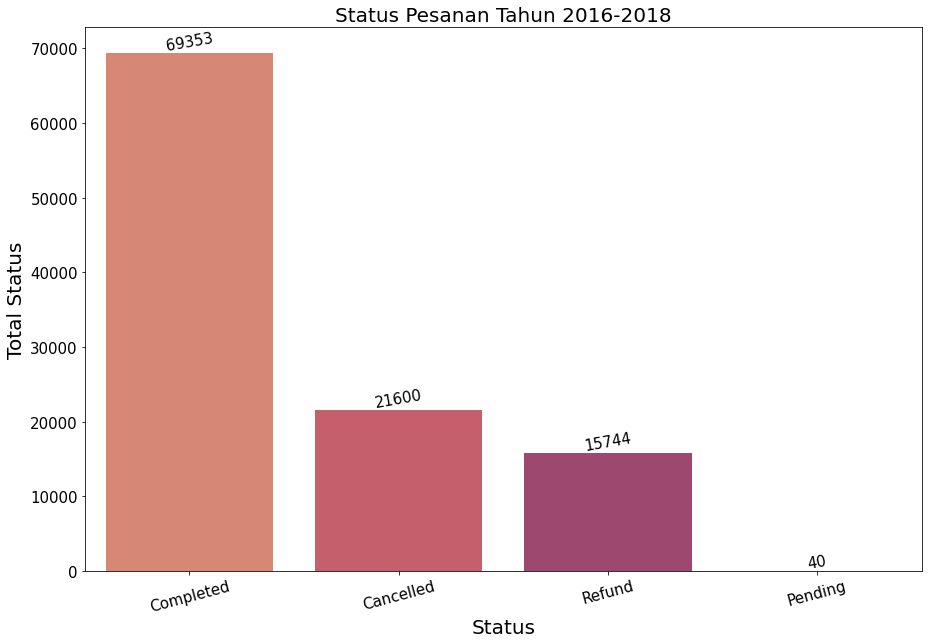

In [78]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Status', data=df, palette = 'flare',linewidth=6)
plt.title("Status Pesanan Tahun 2016-2018",size=20)
plt.xlabel("Status", size=20, color='k')
plt.ylabel("Total Status", size=20, color='k')
plt.xticks(size=15,rotation=15)
plt.yticks(size=15)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.savefig('Visualisasi Business Question 1.jpeg')
plt.show()

#### **Insight** :
- Status completed berjumlah 69.353 setara 65% menempati peringkat paling tinggi transaksinya, sedangkan status cancelled berjumlah 21.600 transaksi setara 20% dari keseluruhan status pemesanan, refund memiliki 15.744 transaksi dan pending memiliki 40 transaksi selama tahun 2016 sampai dengan tahun 2018.
- Tingkat pesanan yang berhasil lebih tinggi yaitu sekitar 65% dibandingkan pembatalan dan refund di karenakan minat customer untuk belanja online terus meningkat dan barang yang di terima sesuai yang di harapkan. Berdasasrkan informasi dari ['thenews'](https://www.thenews.com.pk/print/744670-the-future-of-e-commerce), perkembangan e-commers naik drastis terutama pada akhir 2017 mencapai 92% dan pada tahun 2018 naik menjadi 100% berdasarkan informasi ['techjuice'](https://www.techjuice.pk/pakistans-e-commerce-industry-doubled-its-sales-in-2018/#:~:text=Pakistan's%20e%2Dcommerce%20industry%20saw,2018%20reached%2040.1%20billion%20rupees.)

#### **Saran** : 
- Untuk mengecilkan angka pembatalan pesanan dan refund, perusahaan dapat melakukan evaluasi seperti berikut :
- Melakukan pencegah pembatalan , seperti yang di sampaikan ['partner.booking.com'](https://partner.booking.com/id/bantuan/pedoman/cara-untuk-memahami-mencegah-dan-mengurangi-pembatalan-lebih-baik):
  -  Menawarkan harga non-refundable
  -  Terima berbagai metode pembayaran
  -  Validasi pembayaran dimuka
  -  Balas pertanyaan customer dengan cepat
  -  Pikat pemesan last minute dari perangkat mobile
  -  Buat promosi / diskon
#
- Untuk mengurangi pengembalian barang (refund) menurut ['Mike Bracken'](https://www.skuvault.com/blog/reduce-product-returns/)
  - Mengontrol kualitas barang sebelum melakukan pengiriman
  - Mendeskripsikan produk melalui tulisan, gambar dan ukuran packingan
  - Meminta feedback pelanggan
  - Menampilkan informasi pengiriman dan waktu barang akan sampai
  - Menyediakan customer service real time
#
- Untuk mengurangi penundaan pengiriman (pending), menurut ['upperinc'](https://www.upperinc.com/blog/how-to-avoid-delivery-delays/)
  - Memeriksa persediaan barang (Dapat menggunakan software)
  - Merencanakan pengiriman tepat waktu (pengiriman real time atau pengiriman terjadwal)
  - Menetapkan minimum pemesanan dan maksimal pemesanan
  - Melakukan konfirmasi alamat pengiriman kepada customer
  - Menyediakan pilihan pengiriman menggunakan transportasi darat (Mobil Exspedisi) atau transportasi udara (Pesawat Exspedisi)
  - Meningkatkan dan memantau visibilitas paket selama proses pengiriman
  - Memvalidasi alamat pengiriman sebelum pengiriman.

#### 2. Apa kategori barang yang memiliki status pemesanan completed dan cancelled tertinggi ?

In [79]:
pd.crosstab(index=df['Category'], columns=df['Status'])

Status,Cancelled,Completed,Pending,Refund
Category,,,,
Appliances,3366,6730,1,1545
Beauty & Grooming,1079,7853,0,1120
Books,9,142,0,23
Computing,389,540,0,301
Entertainment,2685,4719,4,683
Health & Sports,211,1037,0,296
Home & Living,531,2149,0,539
Kids & Baby,262,1701,0,480
Men's Fashion,1838,12054,2,5116


In [80]:
pd.crosstab(index=df['Category'], columns=df['Status'], normalize='index').round(2)

Status,Cancelled,Completed,Pending,Refund
Category,,,,
Appliances,0.29,0.58,0.0,0.13
Beauty & Grooming,0.11,0.78,0.0,0.11
Books,0.05,0.82,0.0,0.13
Computing,0.32,0.44,0.0,0.24
Entertainment,0.33,0.58,0.0,0.08
Health & Sports,0.14,0.67,0.0,0.19
Home & Living,0.16,0.67,0.0,0.17
Kids & Baby,0.11,0.70,0.0,0.20
Men's Fashion,0.10,0.63,0.0,0.27


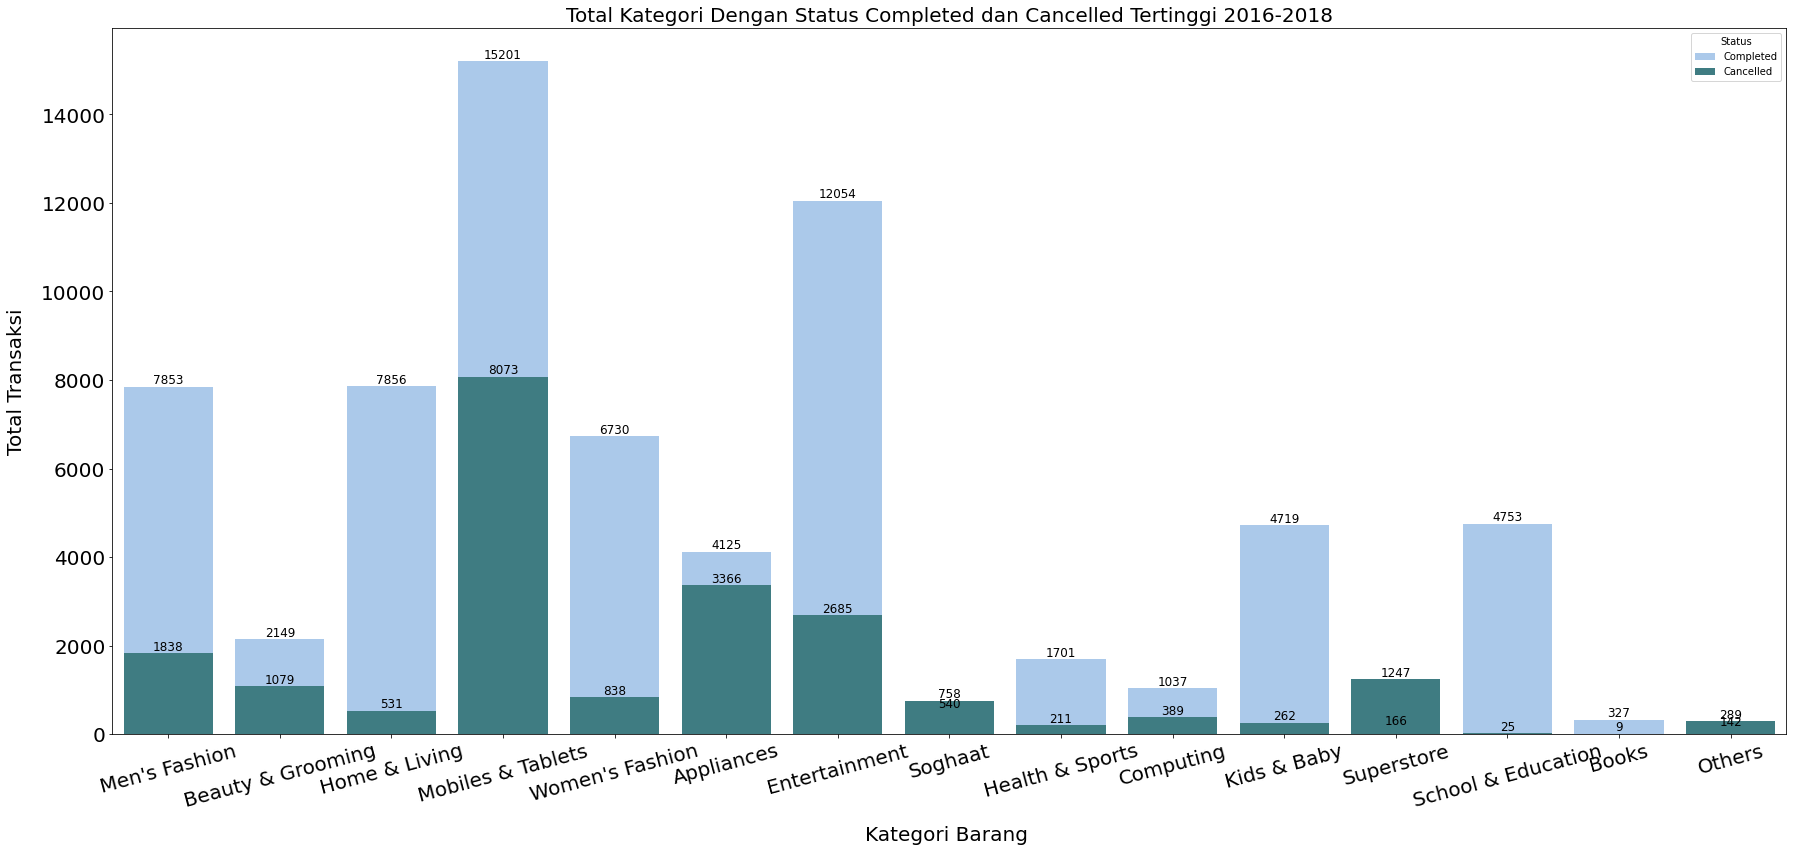

In [81]:
plt.figure(figsize=(30,13))
ax=sns.countplot(x='Category', data=df[(df['Status']=='Completed')]  ,hue='Status', palette='pastel')
bx=sns.countplot(x='Category', data=df[(df['Status']=='Cancelled')]  ,hue='Status', palette='crest_r')
plt.title("Total Kategori Dengan Status Completed dan Cancelled Tertinggi 2016-2018",size=20)
ax.bar_label(ax.containers[0], label_type='edge', size= 12)
bx.bar_label(ax.containers[1], label_type='edge', size =12)
plt.xlabel('Kategori Barang ', size=20, labelpad=15)
plt.ylabel('Total Transaksi', size=20, labelpad=15)
plt.xticks(size=20,rotation=15)
plt.yticks(size=20)
plt.savefig('Visualisasi Business Question 2.jpeg')
plt.show()

#### **Insight** :
- Kategori yang memiliki pemesanan status completed tertinggi ada pada Mobile & Tablets sebesar 15.201 setara 58 persen, dengan pembatalan tertinggi juga sebesar 8.073 setara dengan 31 persen. Selisih persentase completed dengan cancelled ada pada status refund yaitu 11%.
- Tingginya pembelian handphone di pakistan di sebabkan karena masuknya internet 3G dan 4G ke pakistan, hal ini membuat penduduk pakistan ingin ikut menggunakan kecepatan jaringan internet dengan support device yang mendukung. Sumber : ['tribune'](https://tribune.com.pk/story/953333/telecom-sector-pakistan-to-have-40-million-smartphones-by-end-of-2016) 

#### **Saran** :
- Perusahaan dapat memberikan diskon untuk kategori Mobile & Tablets untuk menarik minat pembeli, karena Menurut ['Chen'](https://sciarena.com/storage/models/article/ujY91gcY2S6S5Mi1fBXj06BxlO0uuGg1E32h0OjP9069B2obiHqxVbzWndjU/sales-promotion-and-price-discount-effect-on-consumer-purchase-intention-with-the-moderating-role-.pdf) mengatakan Harga merupakan faktor yang sangat penting untuk mempengaruhi dan menarik pertimbangan dan niat konsumen untuk membeli sebuah produk. Harga diskon berarti tidak hanya harga yang lebih rendah, itu juga berarti untuk mendapatkan layanan yang sama dengan membedakan harga untuk produk yang sama; itu adalah pengurangan uang tertentu dari total harga untuk jangka waktu yang singkat untuk meningkatkan penjualan dan keuntungan konsumen. Diskon harga memiliki pengaruh yang besar pada produk dengan harga tinggi, dan mempengaruhi konsumen, dan meningkatkan nilai produk.



#### 3. Bagaimana hasil dari metode pembayaran ?

In [82]:
pd.crosstab(index=df['Payment_Method_Category'],columns='count').reset_index().sort_values('count',ascending=False)

col_0,Payment_Method_Category,count
0,COD,58603
2,Debit Card,28065
1,Credit Card,12915
3,Electronic Wallet,5124
6,Tranfer Bank,1499
4,Internet Banking,432
5,Reimburse,99


In [83]:
pd.crosstab(index=df['Payment_Method_Category'],columns='count', normalize=True).round(2).reset_index().sort_values('count',ascending=False)

col_0,Payment_Method_Category,count
0,COD,0.55
2,Debit Card,0.26
1,Credit Card,0.12
3,Electronic Wallet,0.05
6,Tranfer Bank,0.01
4,Internet Banking,0.00
5,Reimburse,0.00


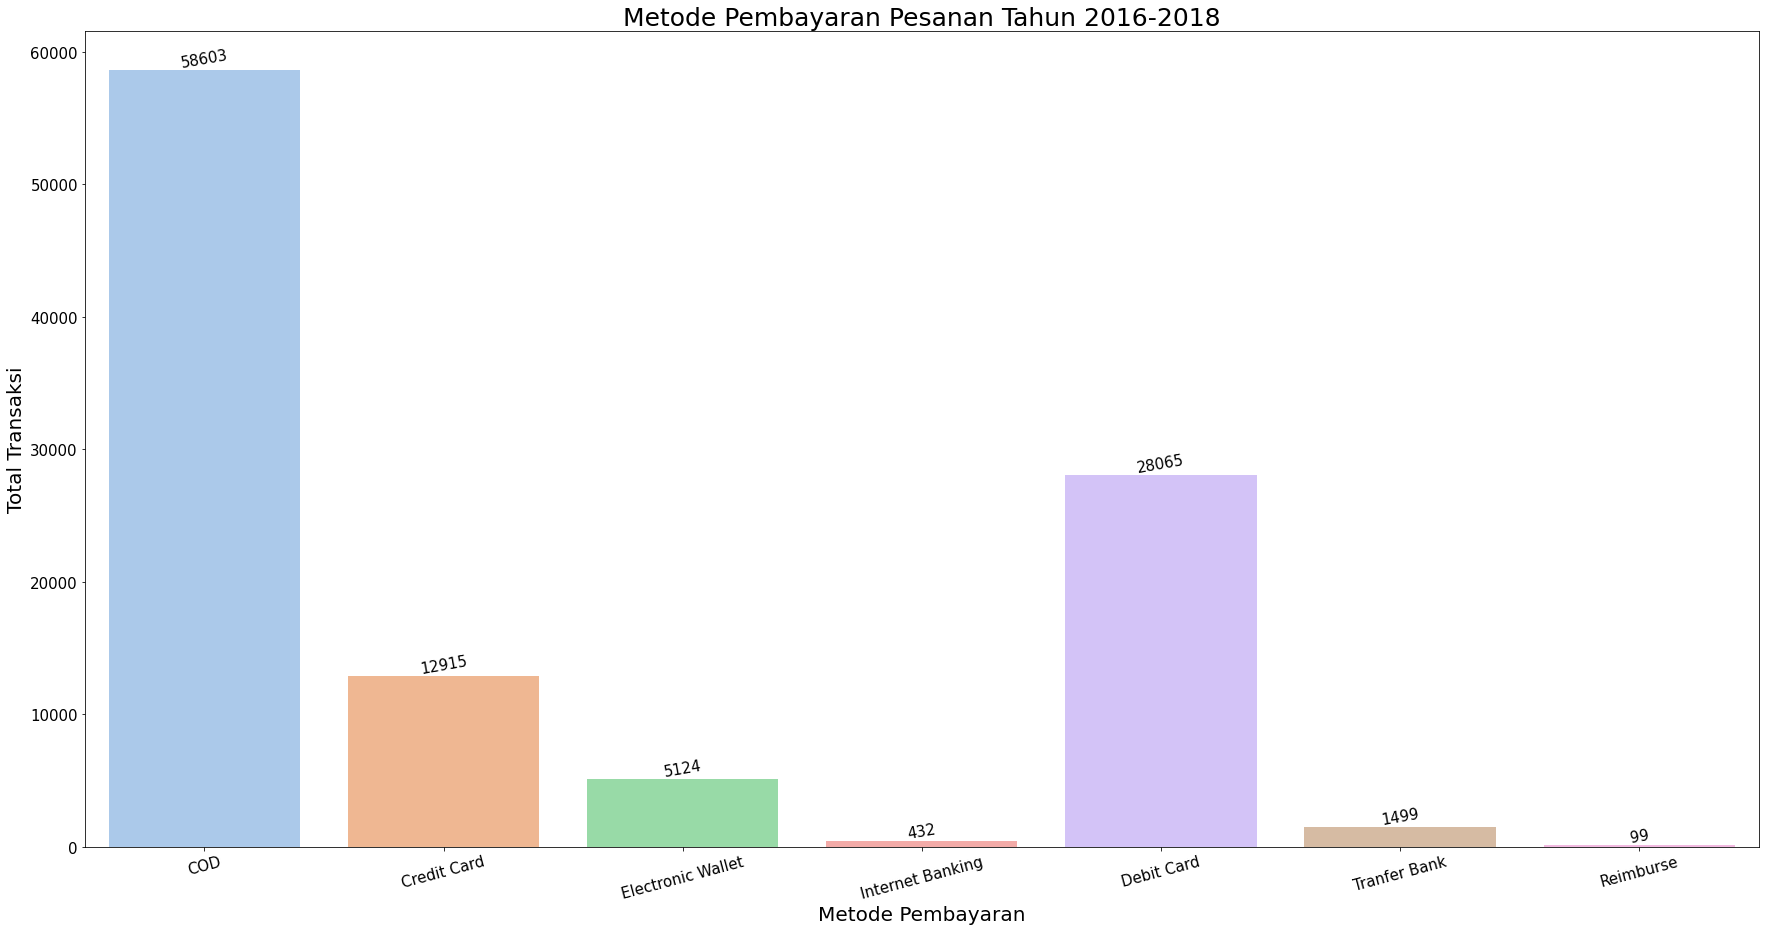

In [84]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x='Payment_Method_Category', data=df, palette = 'pastel',linewidth=6)
plt.title("Metode Pembayaran Pesanan Tahun 2016-2018",size=25)
plt.xlabel("Metode Pembayaran", size=20, color='k')
plt.ylabel("Total Transaksi", size=20, color='k')
plt.xticks(size=15,rotation=15)
plt.yticks(size=15)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.savefig('Visualisasi Business Question 3.jpeg')
plt.show()

#### **Insight** :
- Peringkat tertinggi kategori pembayaran ada pada sistem Cash On Delivery (COD), dengan total transaksi COD sebanyak 58.603 atau sebesar 55% persen, pada peringkat kedua ada debit card dengan nilai 28.065 setara 26% dan peringkat ketiga ada credit card dengan total transaksi 12.915 dengan persentase 12%, Electronic wallet memilik total transaksi 5.124 setara dengan 5%. Tranfer bank memiliki jumlah 1.499 setara 1%, internet bankin memiliki 432 transaksi dengan persentase 0 dan reimburse memilik transaksi 99 dengan persentase 0%.
- Tingginya pembayaran dengan sistem cash on delivery dikarenakan kebiasan penduduk pakistan yang kebiasaan menggunakan uang tunai dan lebih mempercayai jika melihat fisik barang tersebut secara langsung selain itu ada faktor kurangnya memahami teknologi. Seperti yang di bahas oleh ['website shoppingbag](https://www.shoppingbag.pk/blog/why-pakistani-more-happy-with-cod-cash-on-delivery-than-using-credit-card-online/) di bahas, di sebagian besar orang berbelanja di Pakistan bahkan di kota-kota besar mis. Karachi, Lahore, Islamabad dan kota lain di pakistan ragu-ragu untuk menggunakan metode baru teknologi dan ketergantungan pada awalnya. Mereka sulit memahami rumitnya transaksi di balik pembayaran dari kartu kredit/debit card. Itu juga karena mereka sering memegang uang tunai dan jarang menggunakan E-card.

#### **Saran** : 
  - Menurut tinjauan kinerja tahunan [State Bank of Pakistan (SBP) (2017)] — Pakistan, sebagai negara yang bergerak cepat menuju adopsi mode pembayaran digital dengan jumlah transaksi elektronik mencatat pertumbuhan 17% tahun-ke-tahun. Perusahaan dapat mempersiapkan strategi untuk meningkatkan pembayara digital seperti penggunaan credit card, electronic wallet, internet banking , debit card karena pembayaran melalui digital semakin hari semakin bertambah pengunaannya dimasa mendatang. Sumber : ['Sumber informasi Global'](https://medium.com/indrastra/a-brief-note-on-digital-payment-systems-in-pakistan-1959dd95a94c), dan ['Sumber informasi perbankan'](https://www.sbp.org.pk/reports/annual/arFY17/Vol-1/anul-index-eng.htm). Hal ini akan berdampak baik untuk perusahaan terutama rekam catatan transaksi keuangan yang lengkap, menghemat waktu dan lebih aman dari tindak kecurangan,['website mybank'](https://mybank.com/the-advantages-of-personal-internet-banking/)

### 4. Berapa banyak transaksi pada metode pembayaran yang mendapatkan diskon ?

In [85]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df['Discount_Amount_Category'])

Discount_Amount_Category,Dapat Diskon,Tidak Dapat Diskon
Payment_Method_Category,,
COD,3245,55358
Credit Card,8664,4251
Debit Card,24878,3187
Electronic Wallet,3936,1188
Internet Banking,1,431
Reimburse,38,61
Tranfer Bank,1065,434


In [86]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df['Discount_Amount_Category'], normalize='index').round(2)

Discount_Amount_Category,Dapat Diskon,Tidak Dapat Diskon
Payment_Method_Category,,
COD,0.06,0.94
Credit Card,0.67,0.33
Debit Card,0.89,0.11
Electronic Wallet,0.77,0.23
Internet Banking,0.00,1.00
Reimburse,0.38,0.62
Tranfer Bank,0.71,0.29


In [87]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df[df['Discount_Amount_Category']=='Dapat Diskon']['Discount_Amount_Category'])

Discount_Amount_Category,Dapat Diskon
Payment_Method_Category,
COD,3245
Credit Card,8664
Debit Card,24878
Electronic Wallet,3936
Internet Banking,1
Reimburse,38
Tranfer Bank,1065


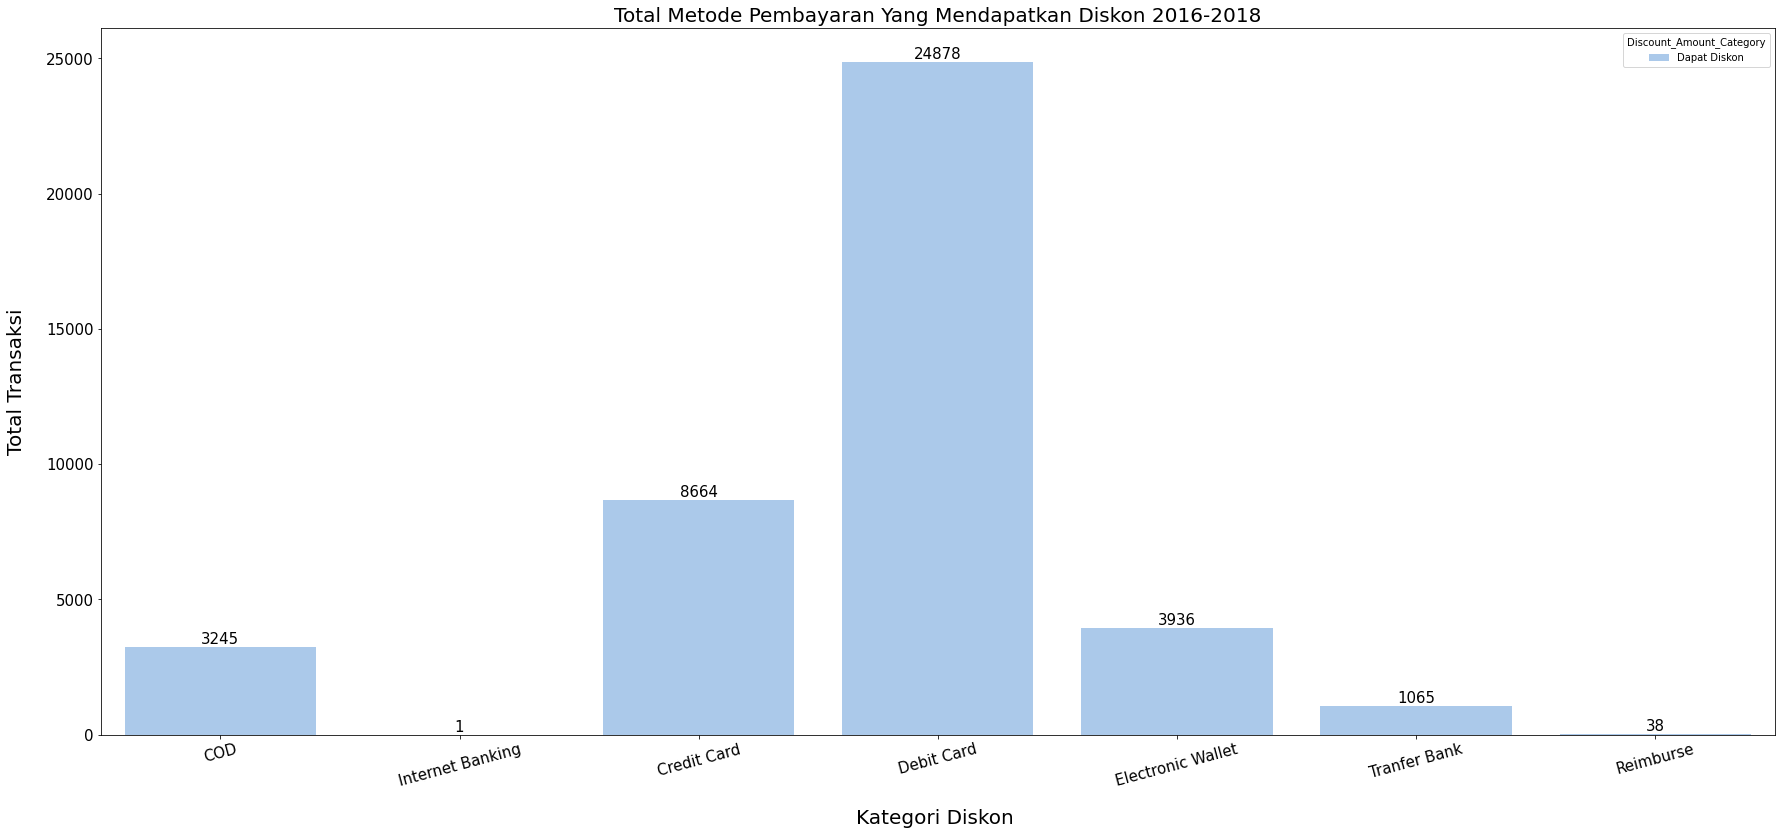

In [88]:
plt.figure(figsize=(30,13))
ax=sns.countplot(x='Payment_Method_Category', data=df[(df['Discount_Amount_Category']=='Dapat Diskon')] ,hue='Discount_Amount_Category', palette='pastel')
plt.title("Total Metode Pembayaran Yang Mendapatkan Diskon 2016-2018",size=20)
ax.bar_label(ax.containers[0], label_type='edge', size= 15)
plt.xlabel('Kategori Diskon ', size=20, labelpad=20)
plt.ylabel('Total Transaksi', size=20, labelpad=20)
plt.xticks(size=15,rotation=15)
plt.yticks(size=15)
plt.savefig('Visualisasi Business Question 4.jpeg')
plt.show()

### **Insight**:
- Berdasarkan persentase :
    - Berdasarkan analisa di atas, Pembayaran dengan debit card memiliki persentase pemberian diskon paling tinggi sebesar 89% dibanding tidak diberikan diskon hanya 11%, pada urutan kedua ada Electronic Wallet total pemberian diskon mencapai 77% dibanding tidak dapat diskon sebanyak 33%, pada urutan ketiga ada tranfer bank dengan mendapatkan diskon 71% dan tidak mendapatkan diskon 29%, di urutan ke empat ada credit card dengan pemberian diskon 67% dibandingkan tidak dapat diskon 33%, pada urutan kelima ada reimburse mendapatkan diskon sebesar 38% dan tidak mendapatkan diskon 62%, pada urutan ke enam ada cash on delivery mendapatkan diskon hanya 6% dari total tidak mendapatkan diskon 94% dan urutan trakhir ada internet banking yang tidak mendapatkan diskon seluruhnya 100%.

- Berdasarkan perhitungan transaksi :
    - Jika di bandingkan dengan total transaksi debit card menempati urutan pertama dengan total transaksi mendapatkan diskon sebanyak 24.878 kali , credit card mendapatkan diskon 8.664 kali, electronic wallet mendapatkan discount 3.936 kali, cash on delivery mendapatkan diskon 3.245 kali, reimburs mendapatkan diskon 38 kali, dan internet banking hanya 1 kali transaksi mendapatkan diskon.

### **Saran** :
- Pemberian diskon berdasarkan metode pembayaran ini cukup bagus karena setiap tahunnya penggunaan transaksi digital terus bertambah penggunaannya, sesuai ['data dari statista'](https://www.statista.com/outlook/dmo/ecommerce/pakistan), penggunaan tranfer bank, debit card, kredit card,e-invoice, e-wallet ini terus meningkat setiap tahunnya dan salah satu langkah untuk ikut dalam perkembangan teknologi bisnis ini perusahaan sudah menggunakan langkah bagus dengan memberikan diskon.

- Pemberian diskon ini juga dapat menarik minat customer untuk membeli lebih banyak barang dan hal ini terbukti dari riset yang di lakukan oleh web ['springer open'](https://fashionandtextiles.springeropen.com/articles/10.1186/s40691-018-0128-2#:~:text=According%20to%20the%20economic%20effects,confirmed%20by%20many%20previous%20studies.), misalnya customer membeli 1 produk dengan harga normal, dibandingkan customer membeli 2 produk dengan harga diskon 50% tapi dengan syarat tertentu customer akan lebih memilih membeli 2 produk walaupun ada persyaratan tertentu.

In [89]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df['Discount_Amount_Category'], normalize='index').round(2)

Discount_Amount_Category,Dapat Diskon,Tidak Dapat Diskon
Payment_Method_Category,,
COD,0.06,0.94
Credit Card,0.67,0.33
Debit Card,0.89,0.11
Electronic Wallet,0.77,0.23
Internet Banking,0.00,1.00
Reimburse,0.38,0.62
Tranfer Bank,0.71,0.29


### 5. Berapa banyak total transaksi metode pembayaran dengan status completed ?

In [90]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df[df['Status']=='Completed']['Status'])

Status,Completed
Payment_Method_Category,
COD,42777
Credit Card,5652
Debit Card,16921
Electronic Wallet,3009
Internet Banking,217
Reimburse,34
Tranfer Bank,743


In [91]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df['Status'], normalize='index').round(2)

Status,Cancelled,Completed,Pending,Refund
Payment_Method_Category,,,,
COD,0.03,0.73,0.00,0.24
Credit Card,0.51,0.44,0.00,0.05
Debit Card,0.37,0.60,0.00,0.03
Electronic Wallet,0.37,0.59,0.00,0.04
Internet Banking,0.19,0.50,0.00,0.31
Reimburse,0.61,0.34,0.00,0.05
Tranfer Bank,0.44,0.50,0.02,0.04


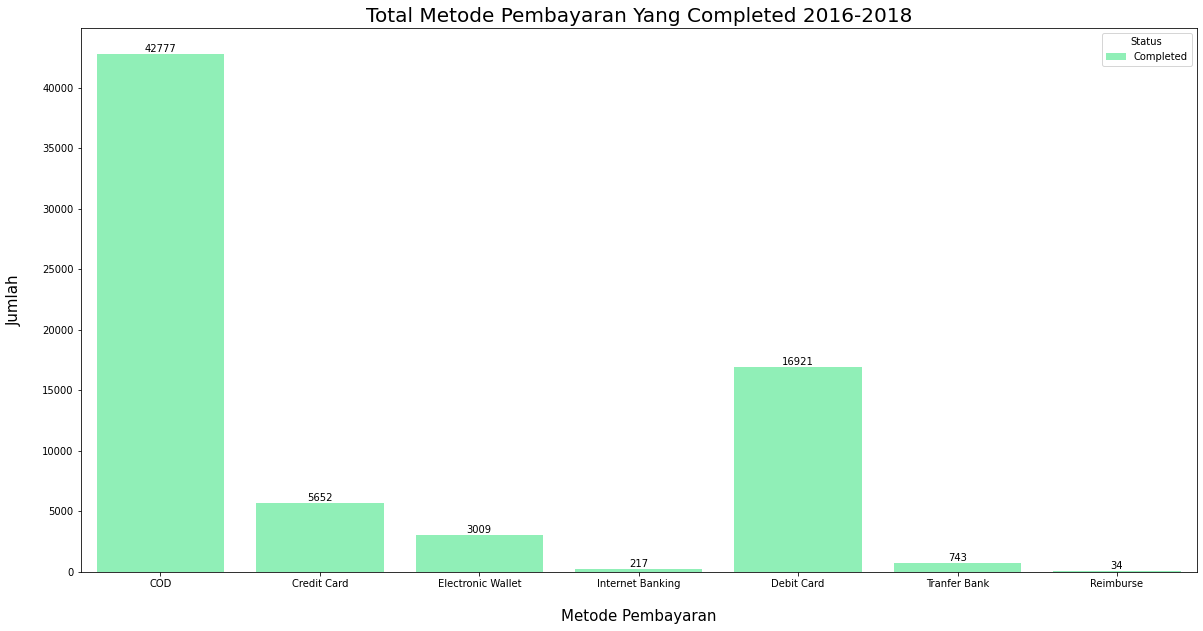

In [92]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Payment_Method_Category', data=df[df['Status']=='Completed'] ,hue='Status', palette="rainbow")
plt.title("Total Metode Pembayaran Yang Completed 2016-2018",size=20)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Metode Pembayaran', size=15, labelpad=20)
plt.ylabel('Jumlah', size=15, labelpad=20)
plt.savefig('Visualisasi Business Question 5.jpeg')
plt.show()

In [93]:
pd.crosstab(index=df['Payment_Method_Category'], columns=df['Status'], normalize='index').round(2)

Status,Cancelled,Completed,Pending,Refund
Payment_Method_Category,,,,
COD,0.03,0.73,0.00,0.24
Credit Card,0.51,0.44,0.00,0.05
Debit Card,0.37,0.60,0.00,0.03
Electronic Wallet,0.37,0.59,0.00,0.04
Internet Banking,0.19,0.50,0.00,0.31
Reimburse,0.61,0.34,0.00,0.05
Tranfer Bank,0.44,0.50,0.02,0.04


### **Insight** : 
- Metode pembayaran dengan sistem Cash On Delivery memiiliki peringkat tertinggi dengan status pemesanan completed dengan total transaksi 42.777 dengan persentase 73% dibandingkan pembayaran dengan debit card dengan status completed berkisar 16.921 dengan persentase 60%. Credit card dengan total transaksi 4.652 dengan persentase 44%. Pembayaran dengan sistem Cash On Delivery masih lebih besar dari pada pembayaran dengan Electronic Wallet dengan total transaksi 3.009 dengan persentase 59%, jika dibandingkan dengan internet banking, status completed dengan pembayaran Cash On Delivery masih lebih tinggi, internet banking memiliki total transaksi 217 dengan persentase 50% dari seluruh total transaksi internet banking. Jika dibandingkan dengan debit card, status pembelian dengan sistem Cash On Delivery masih memiliki total transaksi tertinggi. Transaksi pembayaran dengan metode pembayaran Tranfer Bank memiliki total transaksi 743 dengan persentase 50% dan pembayaran dengan sistem Reimburse memiliki transaksi paling lebih kecil dibandingkan transaksaksi Cash On Delivery yaitu hanya 43 transaksi dengan persentase 34%.
#
- Pembayaran Cash on delivery tinggi ini di karenakan penduduk pakistan memiliki kebiasaan membeli suatu barang dengan pembayaran tunai. Jika mereka memberikan uang maka mereka harus menerima barang, sehingga hal ini membuat tingkat pembayaran cash on delivery pada tabel di atas berada di urutan pertama dengan status completed. Seperti riset dari website ['shoppingbag](https://www.shoppingbag.pk/blog/why-pakistani-more-happy-with-cod-cash-on-delivery-than-using-credit-card-online/) di bahas,  yang di Sebagian besar orang berbelanja di Pakistan bahkan di kota-kota besar mis. Karachi, Lahore, Islamabad dan kota lain di pakistan ragu-ragu untuk menggunakan metode baru teknologi dan ketergantungan pada awalnya. Mereka sulit memahami rumitnya transaksi di balik pembayaran dari kartu kredit/debit card. Itu juga karena mereka sering memegang uang tunai dan jarang menggunakan E-card.
### **Saran** :
- Berdasarkan informasi dari website ['Statista'](https://www.statista.com/outlook/dmo/ecommerce/pakistan#key-market-indicators), penggunaan pembayaran dengan kartu debit,kartu kredit, electronic wallet akan terus berkembang setiap tahunnya di pakistan. Hal ini dapat menjadi pertimbangan perusahaan untuk meningkatkan pelayanan pembayaran dengan elektronik bank seperti kartu debit, kartu kredit, electronik wallet. Berdasarkan tabel di atas terlihat pembayaran menggunakan debit card berhasil sebesar 60% dan pembatalan sebesar 30%, pembayaran electronik wallet sebesar 59% yang berhasil dengan pembatalan 37%, dan pembayaran dengan kartu kredit sebesar 44% dengan pembatalan 51%. Hal ini masih menjadi sebuah peluang untuk perusahaan ecommers dalam meningkatkan pelayanan pembayaran secara elektronik dan perusahaan dapat memberikan informasi terkait benefit menggunakan pembayaran dengan debit card.

### 6. Kapan transaksi dengan status completed paling banyak terjadi (berdasarkan bulan pemesanan) ?

In [94]:
pd.crosstab(index=df['Month'], columns=df['Status'])

Status,Cancelled,Completed,Pending,Refund
Month,,,,
1,1237,3712,0,870
2,1954,4564,9,874
3,2022,5424,0,1227
4,684,3412,0,770
5,2716,5292,1,893
6,887,1905,0,660
7,635,4759,0,1344
8,1133,7805,28,2174
9,758,2997,0,1055


In [95]:
pd.crosstab(index=df['Month'], columns=df[df['Status']=='Completed']['Status'])

Status,Completed
Month,
1,3712
2,4564
3,5424
4,3412
5,5292
6,1905
7,4759
8,7805
9,2997


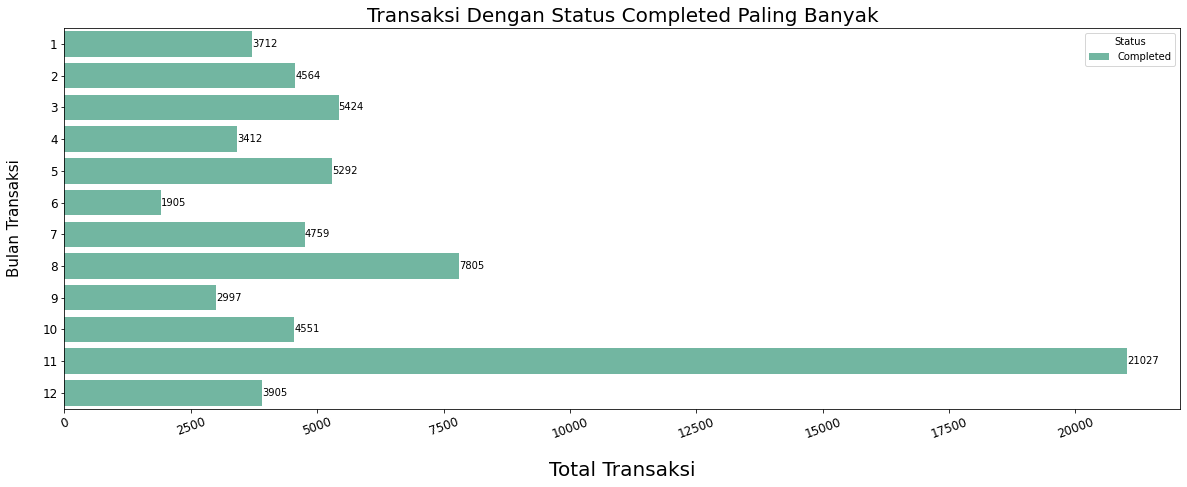

In [96]:
plt.figure(figsize=(20,7))
ax=sns.countplot(y='Month', data=df[df['Status']=='Completed'] ,hue='Status', palette='Set2')
plt.title("Transaksi Dengan Status Completed Paling Banyak",size=20)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Total Transaksi', size=20, labelpad=20)
plt.ylabel('Bulan Transaksi', size=15, labelpad=20)
plt.xticks(size=12,rotation=20)
plt.yticks(size=12)
plt.savefig('Visualisasi Business Question 6.jpeg')
plt.show()

### **Insight** :
- Banyak terjadi transaksi dengan status completed pada bulan November dengan total transaksi 21.027.

### **Saran** :
- Untuk meningkatkan penjualan pada tahun berikutnya yaitu tahun 2019 perusahaan dapat melakukan promosi penjualan dengan iklan pada bulan oktober tahun 2019, berdasarkan informasi dari website zameen.com ['tanggal promosi'](https://www.zameen.com/blog/upcoming-events-lahore-november-2019.html) di bulan November 2019 terdapat festival :
- 1. Dastan-e-Khusro 
- 2. The 3rd National Young Leaders Summit 
- 3. UOL Innovation Olympiad ’19
- 4. Lahore Eat 2019
- 5. Sufi Night
- 6. The 5th Faiz International Festival
- 7. Arts and Crafts Festival

# Kesimpulan :
1. Selama e-commers berlangsung dari tahun 2016-2018 satus keberhasilan mencapai 65%, namun masih terdapat pembatalan transaksi sebesar 20 persen dan refund transaksi sebesar 15 persen., hal ini harus segera di evaluasi dengan penambahan fitur seperti penambahan review/rating toko online yang ada di e-commers untuk meningkatkan kepercayaan pelanggan terhadap penjual/toko yang akan dikunjungi dan fitur tersebut juga dapat perusahaan gunakan datanya sebagai bahan evaluasi berikutnya.
2. Kategori mobile & tablets masih berada di posisi teratas dengan tingkat keberhasilan 58 persen namun terdapat pembatalan transaksi sebesar 31 persen. Hal ini dapat menjadi pertimbangan perusahaan e-commers untuk mengevaluasi pembatalan tersebut sehubungan dengan penggunaan mobile & tablets pasar mobile & tablets di pakistan masih sangat tinggi. Oleh karena itu untuk menarik minat customer lebih besar perusahaan dapat menggunakan strategi dengan memberikan diskon kepada pelanggan untuk menarik minat pelanggan melakukan pembelian product.
3. Metode pembayaran di negara pakistan dengan peringkat tertinggi adalah Cash On Delivery dengan total transaksi 58.603 setara 55% dibandingkan transaksi elektronik perbankan seperti debit card sebesar 26 persen, credit card sebesar 12 persen, Electronic Wallet 5 persen dan tranfer bank 1 persen.Walaupun penggunaan metode pembayaran cash on delivery masih lebih tinggi dari pada pembayaran secara elektronik, ini dapat menjadi pertimbangan perushaaan e-commers seiring perkembangan teknologi terhadap metode pembayaran karena minat customer terhadap penggunaan metode pembayaran elektronik terus bertambah setiap tahunnya.
4. Metode pembayaran yang mendapatkan diskon tertinggi ada pada metode pembayaran debit card dengan persentase 89% di bandingkan pembayaran dengan metode cash on delivery hanya mendapat diskon 6%. Perusahaan dapat menggunakan strategi diskon untuk meningkatkan minat customer dalam melakukan pembelian barang dengan metode pembayaran dengan debit card.
5. Metode pembayaran dengan status completed paling banyak transaksinya ada pada Cash On Delivery. Namun sebaiknya perusahaan dapat mempertimbangkan untuk mempromosikan benefit menggunakan transaksi dengan pembayaran digital untuk menyeimbangi perubahan teknologi dan dapat bersaing dengan kompetitor.
6. Transaksi dengan status completed paling banyak terjadi pada bulan november, hal ini dapat menjadi acuan perusahaan untuk memperluas promosi pada bulan november.